In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [49]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('conversion_data.csv')

In [4]:
# Découverte des features et du dataset

df.head(10)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
5,US,31,0,Seo,1,0
6,China,27,1,Seo,4,0
7,US,23,0,Ads,4,0
8,UK,29,0,Direct,4,0
9,US,25,0,Ads,2,0


In [5]:
# Visualiser la taille du dataset

df.shape

(316200, 6)

In [6]:
# On obeserve la moyenne et la médianne de chaque feature qui nous permet de situer un peu la répartition des valeurs

df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [7]:
# On voit que le taux de converted est très faible

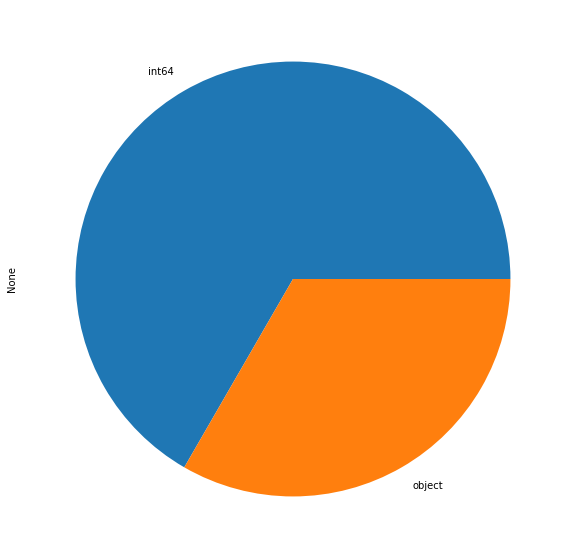

In [8]:
# Observation des différents types de variables présent dans le dataset

plt.figure(figsize=(15,10))

df.dtypes.value_counts().plot.pie()

In [9]:
# Analyse des valeurs manquantes

for i in df :
    print(df[i].isnull().value_counts())

False    316200
Name: country, dtype: int64
False    316200
Name: age, dtype: int64
False    316200
Name: new_user, dtype: int64
False    316200
Name: source, dtype: int64
False    316200
Name: total_pages_visited, dtype: int64
False    316200
Name: converted, dtype: int64


In [10]:
# On crée des intervalles d'âges pour les visualiser plus facilement

bins = [0,25, 35, 50,150]
labels = ['- 25 ans','25 - 35 ans','35 - 50 ans','+ 50 ans']

df['Age2.0'] = pd.cut(df['age'], bins=bins, labels=labels)


In [11]:
val = df['Age2.0'].value_counts()

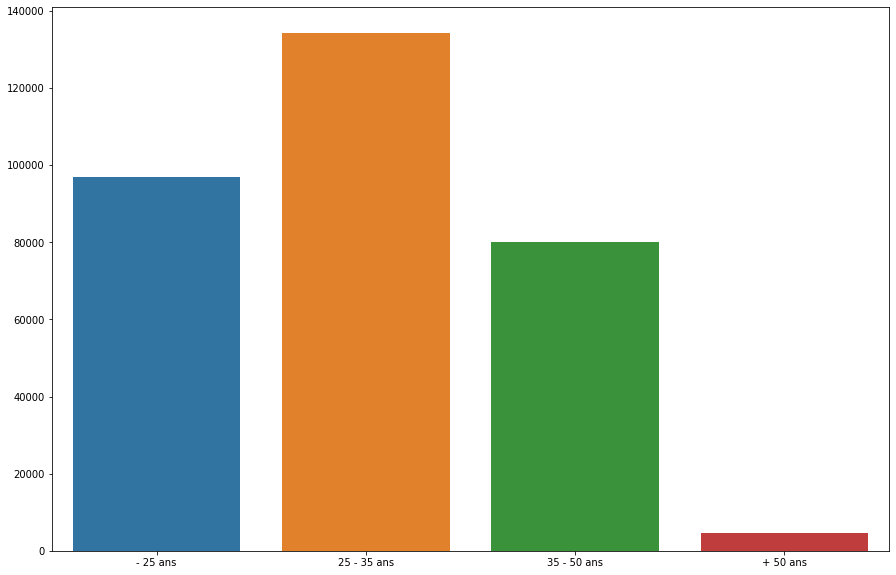

In [12]:
# Graphique pour obsever la répartition des âges

plt.figure(figsize=(15,10))
sns.barplot(x= val.index[:], 
            y= val.values[:],
            data=df)


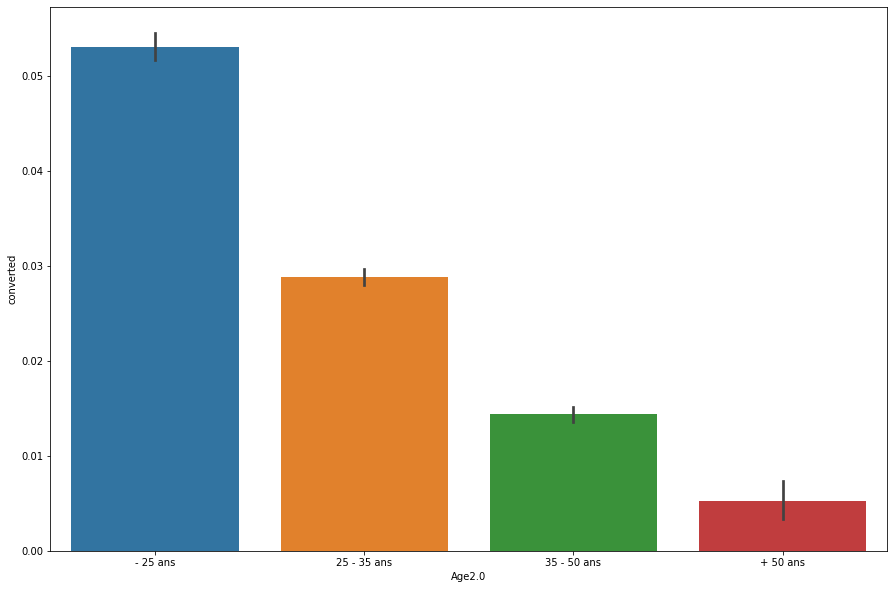

In [13]:
# Taux de conversion en fonction de l'âge

plt.figure(figsize=(15,10))

sns.barplot(x = 'Age2.0', y = 'converted', data = df)

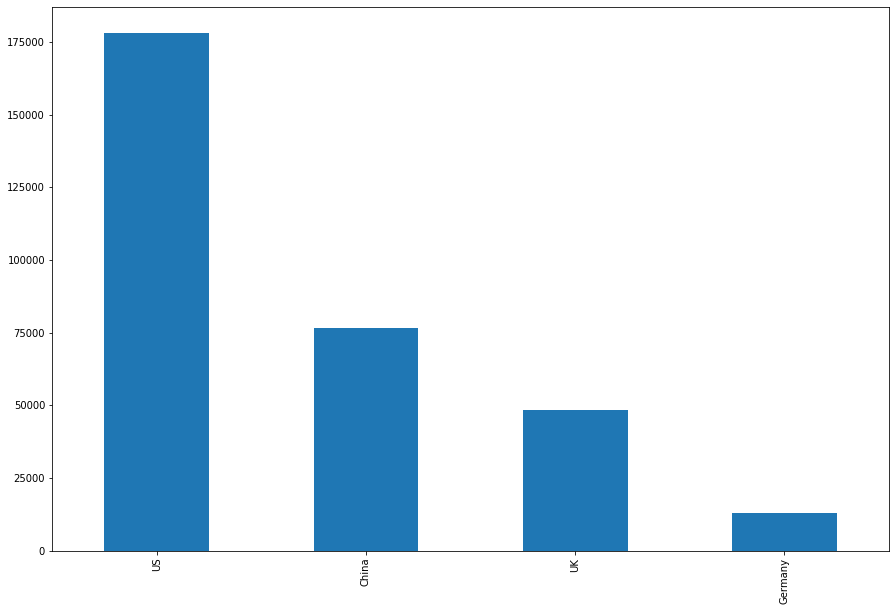

In [14]:
# Visualisation par pays de la répartition des samples

plt.figure(figsize=(15,10))

df['country'].value_counts().plot.bar()

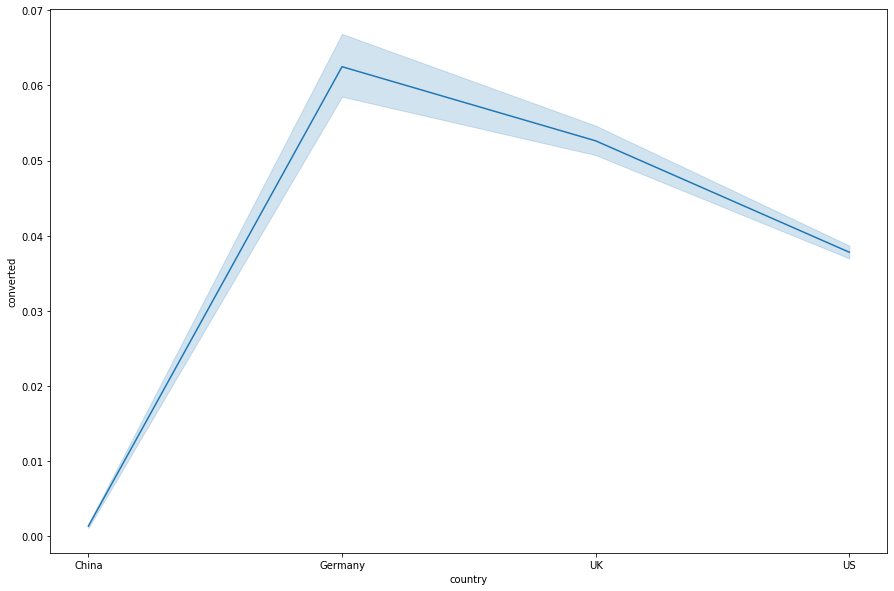

In [15]:
# Regarder la repartition des gens ayant convertis en fonction du pays

plt.figure(figsize=(15,10))

sns.lineplot(x = 'country', y = 'converted', data = df)

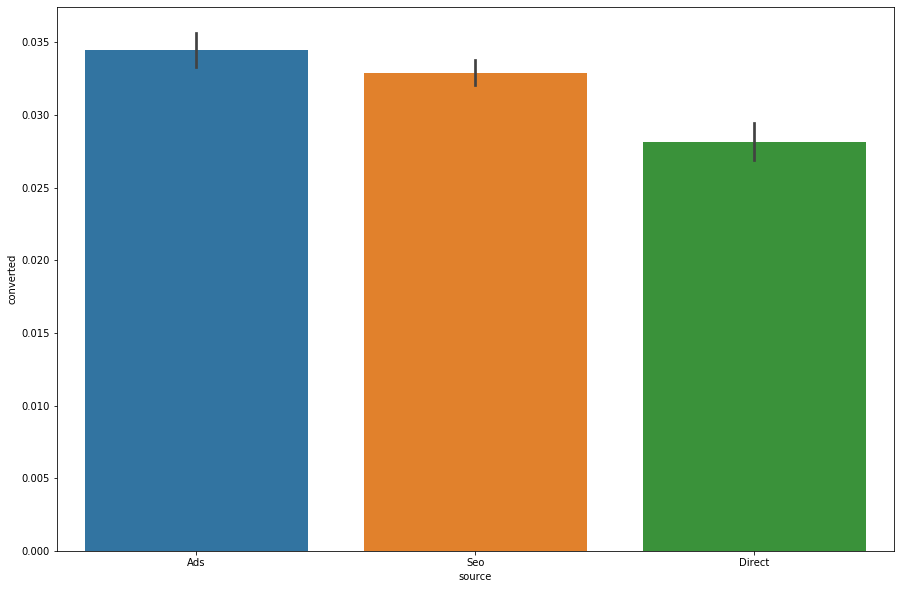

In [16]:
# Analyse du taux de conversion par la source

plt.figure(figsize=(15,10))

sns.barplot(x = 'source', y = 'converted', data = df)

In [17]:
vis = df['total_pages_visited'].value_counts()

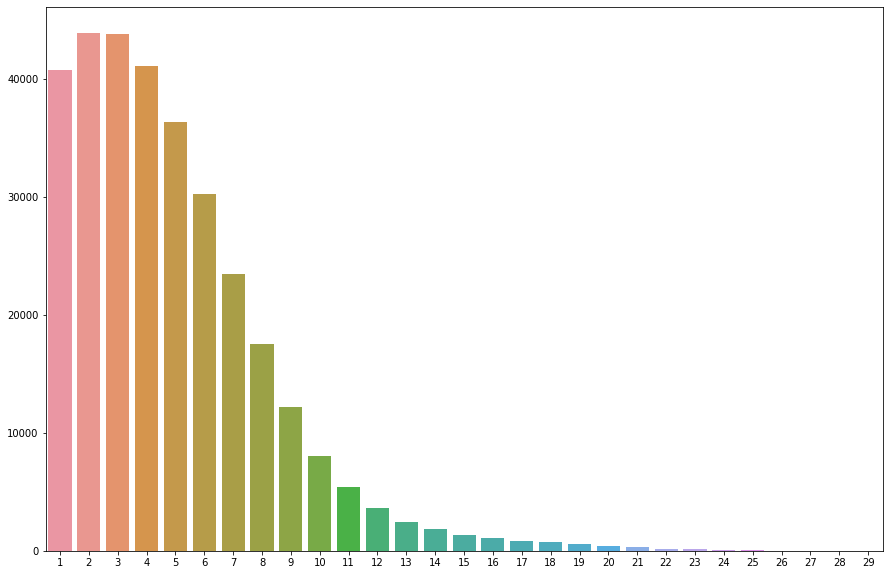

In [18]:
# On visualise la distribution du nombre de pages consulté par les clients

plt.figure(figsize=(15,10))
sns.barplot(x= vis.index[:], 
            y= vis.values[:],
            data=df)


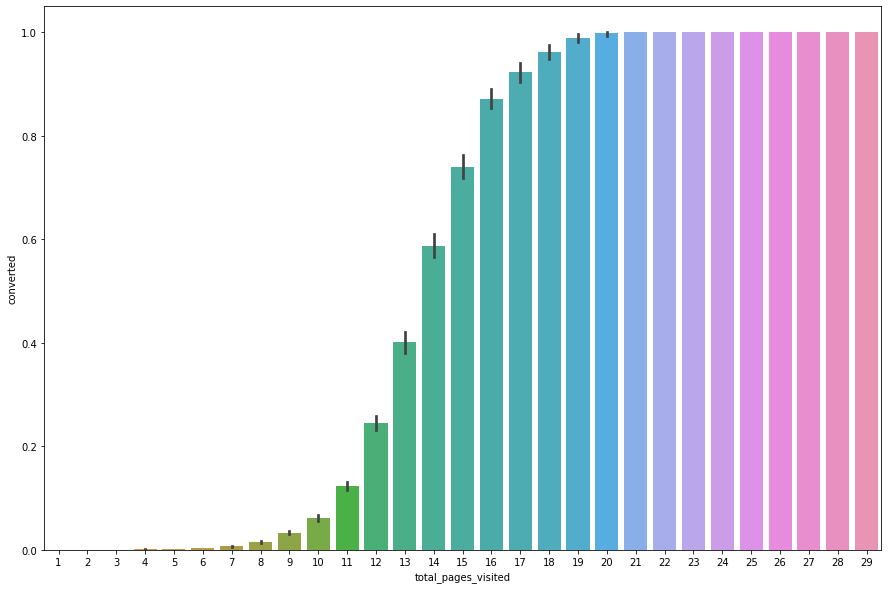

In [19]:
# Visualisation du nombre de page consulté par rapport au taux de conversion

plt.figure(figsize=(15,10))

sns.barplot(x = 'total_pages_visited', y = 'converted', data = df)

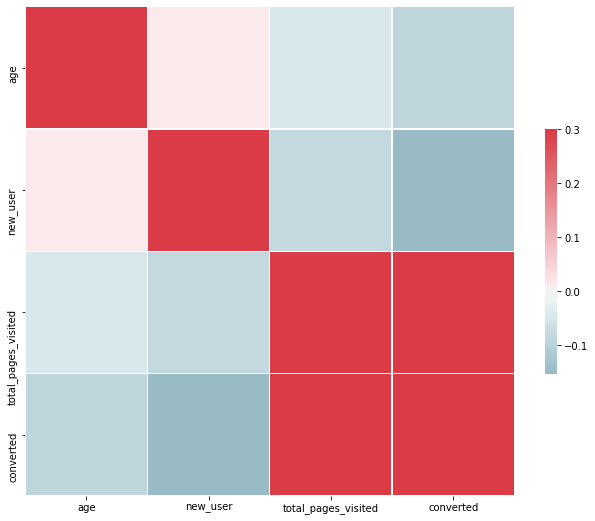

In [20]:
# On va visualiser les relations entre features avec une matrice de corrélation

corr = df.corr()

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
# On peut déjà voir que la variable 'total_pages_visited' est extremement corrélé avec le taux de conversion

In [22]:
# Après avoir bien compris la relation entre chaque variable, place au preprocessing !
# On définit nos variables X et y

X = df.drop(['Age2.0','converted'], axis = 1)
y = df['converted']

In [27]:
# On sépare nos données d'entrainement de nos données de test avec une distribution égale concernant la target 

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.20)

In [28]:
# Standardisation nos features numérique

numeric_features = [1, 2, 4] 
numeric_transformer = Pipeline(steps=[
            ('scaler', StandardScaler())])

In [29]:
# Encodage des variables qualitatives avec un OneHot

categorical_features = ['source','country']
categorical_transformer = Pipeline(steps=[
       ('onehot', OneHotEncoder(sparse= False))])


In [30]:
# Préparation 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [31]:
# Transformation

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [32]:
# Entrainement de plusieurs modèles

model = LogisticRegression()
model1 = KNeighborsClassifier(n_neighbors=1)
model2 = svm.SVC()

print("Training model...")
model.fit(X_train, y_train) 
model1.fit(X_train, y_train) 
model2.fit(X_train, y_train) 
print("...Done.")
print(model.score(X_train,y_train))
print(model1.score(X_train, y_train)) 
print(model2.score(X_train, y_train)) 

Training model...
...Done.
0.9861519607843138
0.9825229285262492
0.9860135989879822


In [1]:
# L'entrainement des différents GridSearch à été effectué sur google colab c'est pourquoi ils ne sont pas tous entrainés ici

In [106]:
# GridSearchCV pour algo KNN 

param = {'n_neighbors' : np.arange(1,20),
        'metric' : ['euclidian','manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidian', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [165]:
# Score insuffisant même avec les meilleurs hyperparamètres

grid.best_score_

0.9854324794433902

In [ ]:
# GridSearchCV pour algo Logistic Regression 

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

In [172]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [174]:
model = LogisticRegression(penalty='l2',C=1.0)
model.fit(X_train, y_train)
print(model.score(X_train,y_train))

0.9860373181530677


In [175]:
# Malheuresement nous n'avons pas pu améliorer les performances de la Logistic Regression car nous avions déjà les meilleurs hyperparamètres

In [32]:
# GridSearch pour l'algorithme pour SVM

param_grid = {'C': [1000],  
              'gamma': [0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.985, total=21.3min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.3min remaining:    0.0s


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.986, total=23.0min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 44.3min remaining:    0.0s


[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.986, total=25.5min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.985, total=22.0min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.986, total=26.2min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.985, total= 6.4min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.985, total= 6.6min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.986, total= 7.3min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.985, total= 7.3min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 171.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1000], 'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [93]:
Svclass = SVC(C=100, kernel='rbf', degree=3, gamma=0.0001, coef0=0.0, shrinking=True, probability=True, tol=0.001)
Svclass.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [94]:
predicted_y = Svclass.predict(X_test)

In [ ]:
# XGBoost 

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter = param_comb, scoring='roc_auc', n_jobs=4, cv=4, verbose=3, random_state=1001 )

random_search.fit(X_train, y_train)

print(random_search.best_score_ * 2 - 1)

# Score 0.971

In [111]:
# Random Forest GridSearchCV 

rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [114]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [115]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
pred
print("Accuracy:",metrics.accuracy_score(y_test, pred))

# Score 0.986 

Accuracy: 0.9858475648323846


In [112]:
# Bagging avec un decision Tree

params = {'n_estimators': [40, 42], 'base_estimator__max_leaf_nodes':[10, 15], 'base_estimator__max_depth':[4, 5, 6]}
dt = DecisionTreeClassifier()
bc = BaggingClassifier(base_estimator=dt, oob_score=True, random_state=1) 

bc_grid = GridSearchCV(estimator=bc, param_grid=params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
bc_grid.fit(X_train, y_train)
best_params = bc_grid.best_params_
print(best_params)

# Score 0.986

{'base_estimator__max_depth': 5, 'base_estimator__max_leaf_nodes': 15, 'n_estimators': 40}


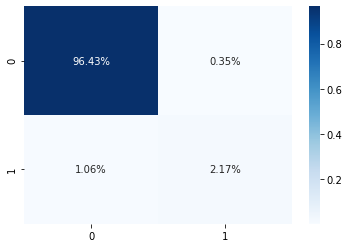

In [89]:
# Visualisation de notre SVM(SVC) avec une confusion matrix

cf_matrix = confusion_matrix(y_test, predicted_y)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

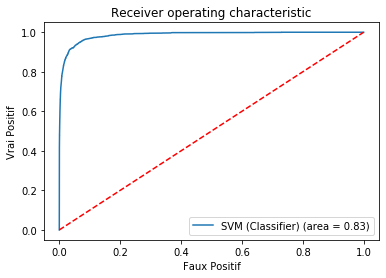

In [104]:
# Courbe ROC et AUC

logit_roc_auc = roc_auc_score(y_test, Svclass.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Svclass.predict_proba(X_test)[:,1]) 
plt.figure()
plt.plot(fpr, tpr, label='SVM (Classifier) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Faux Positif')
plt.ylabel('Vrai Positif')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [3]:
# Conclusion : Nous aurions peut être pu faire de l'undersampling car il y avait une très grande différence entre les 0 et 1 de ntore target
# Nous pourrions essayer un algorithme de stacking (Classifier) 
